In [1]:
import pandas as pd
import jieba
from tkinter import _flatten # 展平
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 导入停用词表
with open('../data/stoplist.txt', 'r', encoding='utf-8') as f:
    stop_words = f.read()

stop_words = ['\n', '', ' '] + stop_words.split() # 可以自己添加新的停用词进去
stop_words

['\n',
 '',
 ' ',
 '\ufeff',
 '说',
 '人',
 '元',
 'hellip',
 '&',
 ',',
 '?',
 '、',
 '。',
 '"',
 '"',
 '《',
 '》',
 '！',
 '，',
 '：',
 '；',
 '？',
 '""',
 '的',
 '了',
 '人民',
 '末',
 '啊',
 '阿',
 '哎',
 '哎呀',
 '哎哟',
 '唉',
 '俺',
 '俺们',
 '按',
 '按照',
 '吧',
 '吧哒',
 '把',
 '罢了',
 '被',
 '本',
 '本着',
 '比',
 '比方',
 '比如',
 '鄙人',
 '彼',
 '彼此',
 '边',
 '别',
 '别的',
 '别说',
 '并',
 '并且',
 '不比',
 '不成',
 '不单',
 '不但',
 '不独',
 '不管',
 '不光',
 '不过',
 '不仅',
 '不拘',
 '不论',
 '不怕',
 '不然',
 '不如',
 '不特',
 '不惟',
 '不问',
 '不只',
 '朝',
 '朝着',
 '趁',
 '趁着',
 '乘',
 '冲',
 '除',
 '除此之外',
 '除非',
 '除了',
 '此',
 '此间',
 '此外',
 '从',
 '从而',
 '打',
 '待',
 '但',
 '但是',
 '当',
 '当着',
 '到',
 '得',
 '的',
 '的话',
 '等',
 '等等',
 '地',
 '第',
 '叮咚',
 '对',
 '对于',
 '多',
 '多少',
 '而',
 '而况',
 '而且',
 '而是',
 '而外',
 '而言',
 '而已',
 '尔后',
 '反过来',
 '反过来说',
 '反之',
 '非但',
 '非徒',
 '否则',
 '嘎',
 '嘎登',
 '该',
 '赶',
 '个',
 '各',
 '各个',
 '各位',
 '各种',
 '各自',
 '给',
 '根据',
 '跟',
 '故',
 '故此',
 '固然',
 '关于',
 '管',
 '归',
 '果然',
 '果真',
 '过',
 '哈',
 '哈哈',
 '呵',
 '和',
 '何',
 '何处',
 '何况',
 '何

In [2]:
# 导入爬取到的影评数据
data = pd.read_csv('liulangdiqiu.csv', encoding='GB18030')

# 分析好评与差评的关键信息

In [3]:
data_cut = data['短评正文'].apply(jieba.lcut) # 对每一列都进行分词
data_after = data_cut.apply(lambda x: [i for i in x if i not in stop_words]) # 对于分词后结果进行去停用词
data_after

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Jarvis\AppData\Local\Temp\jieba.cache
Loading model cost 0.564 seconds.
Prefix dict has been built successfully.


0      [北京, 道路, 委, 提醒, 道路, 千万条, 第一条, 行车, 规范, 亲人, 两行, ...
1      [求求, 编剧, 人类, 地球, 生存, 请别, bb, 家庭, 琐事, 煽情, 烂, 梗,...
2      [终于, 轮, 仰望, 星空, 启示录, 死亡, 废墟, 赛博, 朋克, 地下城, 烟波浩渺...
3                    [悲伤, 故事, 太阳, 毁灭, 地球, 流浪, 我国, 校服, 丑]
4      [华语, 意义, 第一部, 科幻, 大片, 刘慈欣, 硬核, 科幻, 设定, 小兵, 扛, ...
                             ...                        
495    [中国, 科幻电影, 希望, 老泪纵横, 演, 太, 演, 两个, 小孩, 戏, 姥爷, 配...
496    [中国, 科幻电影, 元年, 元年, 中国, 科幻, 有没有, 希望, 在乎, 电影, 值得...
497                                      [中国式, 煽情, 又臭又长]
498    [全片, 很尬, 剧情, 发展, 煽情, 尬, 人物, 设定, 奇怪, 全片, 找, 不到,...
499                         [看一遍, 特斯拉, 上天, 感受一下, 太空, 浪漫]
Name: 短评正文, Length: 500, dtype: object

In [4]:
_flatten(list(data_after)) # 展平数据，上面所有数据都放进一个元组中了

('北京',
 '道路',
 '委',
 '提醒',
 '道路',
 '千万条',
 '第一条',
 '行车',
 '规范',
 '亲人',
 '两行',
 '泪',
 '这句',
 '广播',
 '语',
 '土',
 '洗脑',
 '押点',
 '韵',
 '哈哈哈',
 '电影',
 '预期',
 '恢弘',
 '磅礴',
 '晨昏',
 '线',
 '过后',
 '永夜',
 '火种',
 '计划',
 '地球',
 '流浪',
 '木星',
 '推动',
 '地球',
 '大小',
 '设定',
 '没想到',
 '中国',
 '拍',
 '架构',
 '格局',
 '科幻片',
 '第一部',
 '了不得',
 '国外',
 '科幻',
 '感觉',
 '远',
 '熟悉',
 '北京',
 '裤衩',
 '上海',
 '东方明珠',
 '零下',
 '89',
 '°',
 '冰天',
 '冻地',
 '末世',
 '场景',
 '猎奇',
 '唏嘘',
 '剧情',
 '套路',
 '这部',
 '中国',
 '文化背景',
 '科幻',
 '新生儿',
 '鼓励',
 '多于',
 '挑剔',
 '导演',
 '美国',
 '拍',
 '科幻',
 '放弃',
 '地球',
 '挖掘',
 '新',
 '人类',
 '居住地',
 '中国',
 '放弃',
 '地球',
 '守',
 '住家',
 '土',
 '情怀',
 '希望',
 '回家',
 '唯一',
 '方向',
 '求求',
 '编剧',
 '人类',
 '地球',
 '生存',
 '请别',
 'bb',
 '家庭',
 '琐事',
 '煽情',
 '烂',
 '梗',
 '瞎',
 '刘慈欣',
 '原作',
 '宏大',
 '主题',
 '终于',
 '轮',
 '仰望',
 '星空',
 '启示录',
 '死亡',
 '废墟',
 '赛博',
 '朋克',
 '地下城',
 '烟波浩渺',
 '末日',
 '想象',
 '缔造',
 '意义',
 '第一部',
 '国产',
 '硬',
 '科幻',
 '拖',
 '地球',
 '逃离',
 '太阳系',
 '惊艳',
 '设定',
 '便是',
 '家国',
 '情怀',
 '宏大',
 '投射',
 '正应',
 '刘慈欣

In [5]:
# 统计整体词频
word_frequency = pd.Series(_flatten(list(data_after))).value_counts()
word_frequency

中国    250
电影    238
科幻    229
地球    214
流浪    120
     ... 
放到      1
换来      1
荒原      1
改词      1
人情      1
Length: 6423, dtype: int64

In [12]:
mask = plt.imread('aixin.jpg') # 词云的背景图片

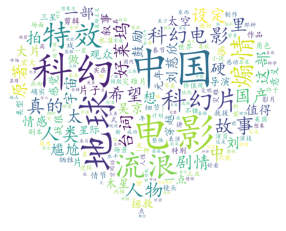

In [13]:
wc = WordCloud(font_path='C:/Windows/Fonts/simkai.ttf', mask=mask, background_color='white') # 设置字体和背景
wc.fit_words(word_frequency) # 将词放进去

# 显示词云
plt.axis('off') # 关闭坐标轴
plt.imshow(wc)

In [14]:
# 自定义一个函数
def my_word_cloud(data=None, stop_words=None, img='aixin.jpg'):
    data_cut = data.apply(jieba.lcut) # 对每一列都进行分词
    data_after = data_cut.apply(lambda x: [i for i in x if i not in stop_words]) # 对于分词后结果进行去停用词

    # 统计整体词频
    word_frequency = pd.Series(_flatten(list(data_after))).value_counts()
    
    mask = plt.imread(img) # 词云的背景图片
    
    wc = WordCloud(font_path='C:/Windows/Fonts/simkai.ttf', mask=mask, background_color='white') # 设置字体和背景
    wc.fit_words(word_frequency) # 将词放进去

    # 显示词云
    plt.axis('off') # 关闭坐标轴
    plt.imshow(wc)

In [17]:
negative_index = data['评分'] < 30 # 差评的索引
positive_index = data['评分'] >= 30 # 好评的索引

(500,) (500,)


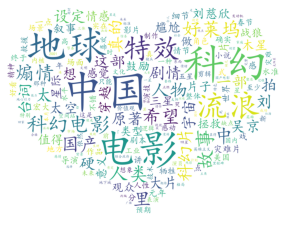

In [18]:
my_word_cloud(data=data['短评正文'][positive_index], stop_words=stop_words) # 好评的词云图

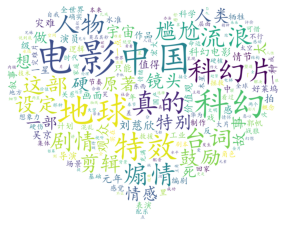

In [19]:
my_word_cloud(data=data['短评正文'][negative_index], stop_words=stop_words) # 差评的词云图

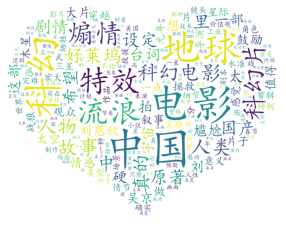

In [20]:
my_word_cloud(data=data['短评正文'], stop_words=stop_words) # 整体评论数据的词云图

# 分析评论数量及评分与时间的关系

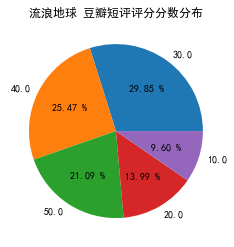

In [25]:
# 数据和包上面已经导入了
plt.rcParams['font.sans-serif'] = 'SimHei'

# 评分的占比
scores = data['评分'].value_counts()
plt.pie(scores, autopct='%.2f %%', labels=scores.index)
plt.title("流浪地球 豆瓣短评评分分数分布")
plt.show()

In [46]:
day_num = data['发表时间'].apply(lambda x: x.split(' ')[0]).value_counts() # 只取出日期
day_num = day_num.sort_index() # 按索引排序
day_num

2019-01-11      1
2019-01-12      1
2019-01-20     15
2019-01-21      2
2019-01-22      1
2019-01-27      3
2019-01-28     21
2019-01-29     11
2019-01-30      1
2019-02-02      1
2019-02-04      4
2019-02-05    117
2019-02-06     74
2019-02-07     64
2019-02-08     41
2019-02-09     30
2019-02-10     25
2019-02-11     19
2019-02-12     17
2019-02-13      9
2019-02-14     11
2019-02-15      5
2019-02-16      3
2019-02-17      3
2019-02-19      4
2019-02-20      1
2019-02-22      3
2019-02-23      4
2019-02-24      2
2019-02-26      2
2019-03-13      1
2019-03-30      1
2019-04-22      1
2019-05-08      1
2019-05-12      1
Name: 发表时间, dtype: int64

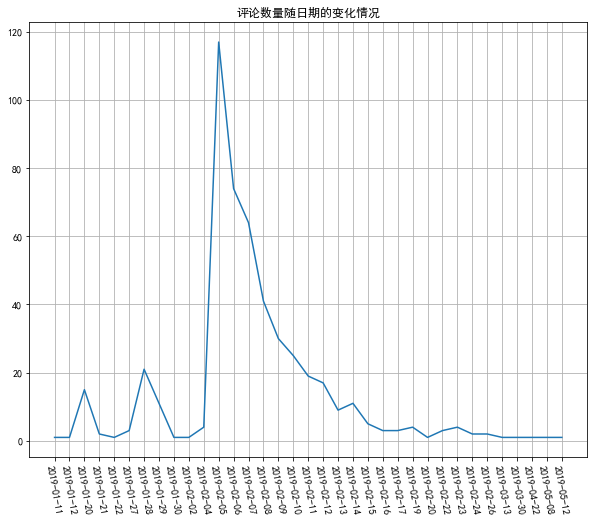

In [54]:
# 影评随日期的关系
plt.figure(figsize=(10, 8))
plt.plot(range(len(day_num)), day_num) # 绘制折线图
plt.xticks(range(len(day_num)), day_num.index, rotation=280) # x轴刻度， rotation表示刻度值的旋转角度
plt.grid() # 添加网格背景
plt.title("评论数量随日期的变化情况")
plt.show()

In [50]:
#  评论数量随时刻的变化情况
hour_num = pd.to_datetime(data['发表时间']).apply(lambda x: x.hour).value_counts() # 先转换成时间格式,再提取小时
hour_num = hour_num.sort_index()
hour_num

0     21
1     26
2     11
3     12
4      3
5      5
6      2
7      8
8     11
9     12
10    13
11    15
12    20
13    21
14    27
15    18
16    26
17    30
18    30
19    37
20    25
21    41
22    47
23    39
Name: 发表时间, dtype: int64

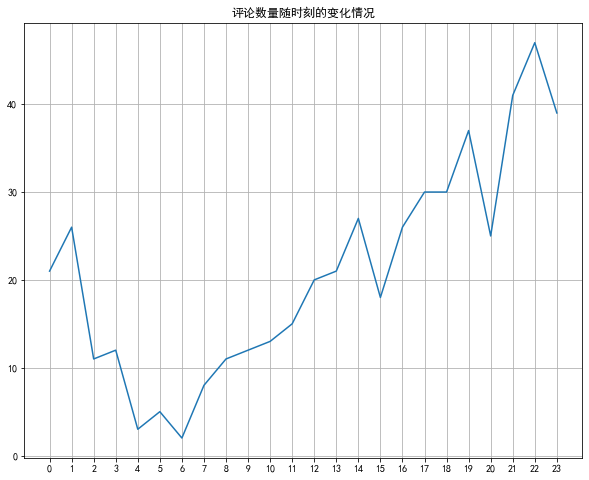

In [53]:
# 影评随时刻的关系
plt.figure(figsize=(10, 8))
plt.plot(range(len(hour_num)), hour_num) # 绘制折线图
plt.xticks(range(len(hour_num)), hour_num.index) # x轴刻度
plt.grid() # 添加网格背景
plt.title("评论数量随时刻的变化情况")
plt.show()

In [55]:
# 不同评分随时间的关系
data.loc[:, ['发表时间', '评分']]

,发表时间,评分
0,2019-02-04 15:56:16,40.0
1,2019-02-05 10:24:19,10.0
2,2019-01-29 20:10:48,50.0
3,2019-02-05 00:24:35,40.0
4,2019-01-20 19:00:54,50.0
...,...,...
495,2019-02-07 13:28:05,50.0
496,2019-02-05 10:52:11,50.0
497,2019-02-10 22:32:08,NaN
498,2019-02-08 23:48:55,20.0


In [101]:
data['发布时间'] = data['发表时间'].apply(lambda x: x.split(' ')[0])# 发表时间不动，新增加一列为发布时间表示只有日期
time_num = data['发布时间'].drop_duplicates().sort_values() # 去重并排序
score_num = data['评分'].drop_duplicates().sort_values() # 对评分也进行去重并排序

# 这是的tmp都是0填充的数据
day_score = pd.DataFrame(0, index=time_num, columns=score_num)

# 遍历并统计各时间各评分的频数
for i, j in zip(data['发布时间'], data['评分']):
    day_score.loc[i, j] += 1
day_score = day_score.iloc[:, :-1] # 不算NaN这一列
day_score

评分,10.0,20.0,30.0,40.0,50.0
发布时间,,,,,
2019-01-11,0,0,1,0,0
2019-01-12,0,1,0,0,0
2019-01-20,0,1,0,7,7
2019-01-21,0,0,0,0,2
2019-01-22,0,0,0,0,1
2019-01-27,0,0,1,1,1
2019-01-28,0,2,2,13,3
2019-01-29,0,1,4,1,5
2019-01-30,0,0,1,0,0


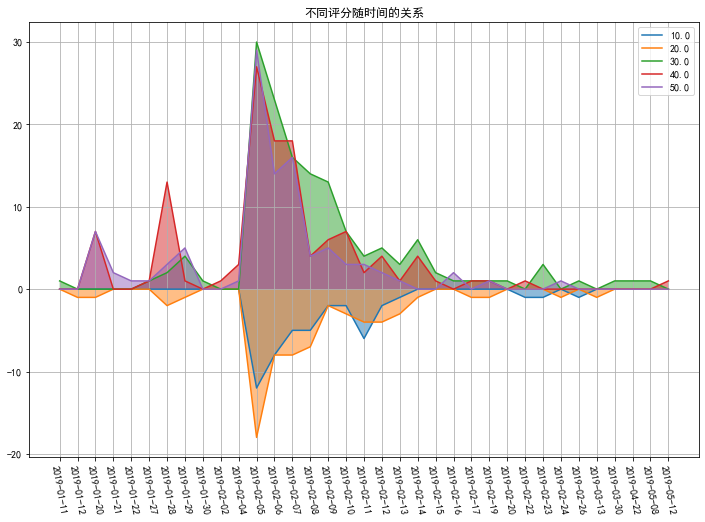

In [102]:
# 绘制填充图
plt.rcParams['axes.unicode_minus'] = False # 符号正确显示

n, m = day_score.shape # 形状,n行，m列
plt.figure(figsize=(12,8))
for i in range(m):
    plt.plot(range(n), (-1 if i<2 else 1)*day_score.iloc[:, i]) # 好评放上面，差评放下面
    plt.fill_between(range(n), (-1 if i<2 else 1)*day_score.iloc[:, i], alpha=0.5) # 填充
plt.grid()
plt.title("不同评分随时间的关系")
plt.legend(day_score.columns) # 图例
plt.xticks(range(n), day_score.index, rotation=280)
plt.show()

# 分析评论者的城市分布情况

In [86]:
city_num = data['居住城市'].loc[data['居住城市'] != '未知'].value_counts()[:10] # 不算未知的
city_num

北京                              144
上海                               73
广东深圳                             16
广东广州                             16
浙江杭州                             15
江苏南京                             14
四川成都                             10
中国香港                              8
湖南长沙                              7
New York City, United States      6
Name: 居住城市, dtype: int64

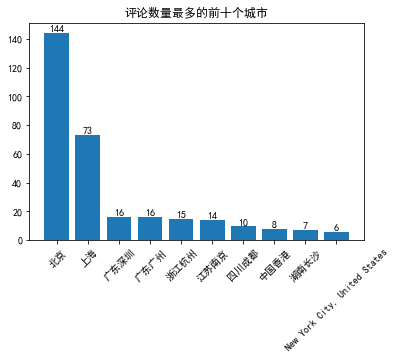

In [87]:
# 评论数量最多的前十个城市
plt.bar(range(10), city_num) # 柱状图
plt.xticks(range(10), city_num.index, rotation=45) # 设置刻度
plt.title("评论数量最多的前十个城市")

# 设置文本
for i, j in enumerate(city_num):
    plt.text(i, j, j, ha='center', va='bottom')

plt.show()

In [88]:
# 评分数量与城市的关系
tmp2 = pd.DataFrame(0, 
                    index=data['评分'].drop_duplicates().sort_values(),
                    columns=data['居住城市'].drop_duplicates())
tmp2

居住城市,北京,江苏南京,广东深圳,辽宁大连,陕西西安,重庆,"P'yŏngyang, North Korea","Montréal, Canada",上海,未知,...,广西南宁,"讷河, 齐齐哈尔",云南文山,"Reykjavík, Iceland","Cincinnati, United States",福建漳州,"Frankfurt (am Main), Germany","Washington, D.C, United States",河北邯郸,"Seoul (Sŏul), South Korea"
评分,,,,,,,,,,,,,,,,,,,,,
10.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NaN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
for i, j in zip(data['评分'], data['居住城市']):
    tmp2.loc[i, j] += 1

tmp2

居住城市,北京,江苏南京,广东深圳,辽宁大连,陕西西安,重庆,"P'yŏngyang, North Korea","Montréal, Canada",上海,未知,...,广西南宁,"讷河, 齐齐哈尔",云南文山,"Reykjavík, Iceland","Cincinnati, United States",福建漳州,"Frankfurt (am Main), Germany","Washington, D.C, United States",河北邯郸,"Seoul (Sŏul), South Korea"
评分,,,,,,,,,,,,,,,,,,,,,
10.0,5,2,2,0,0,1,0,0,6,7,...,0,0,0,0,0,0,0,0,0,1
20.0,11,1,1,0,3,0,0,0,14,5,...,0,0,0,0,1,0,0,0,0,0
30.0,47,6,4,1,2,0,2,0,21,8,...,0,0,0,1,0,0,1,0,0,0
40.0,42,2,3,0,0,1,0,0,17,11,...,1,0,0,0,0,1,0,1,0,0
50.0,35,3,6,1,0,0,0,0,14,10,...,0,1,0,0,0,0,0,0,1,0
NaN,4,0,0,0,0,0,0,1,1,4,...,0,0,1,0,0,0,0,0,0,0


In [91]:
city_5 = city_num[:5]
city_5

北京      144
上海       73
广东深圳     16
广东广州     16
浙江杭州     15
Name: 居住城市, dtype: int64

In [96]:
city_5_score = tmp2.loc[:, city_5.index].iloc[:5, :] # 不要NaN行
city_5_score

,北京,上海,广东深圳,广东广州,浙江杭州
评分,,,,,
10.0,5,6,2,2,1
20.0,11,14,1,3,4
30.0,47,21,4,5,5
40.0,42,17,3,2,2
50.0,35,14,6,3,3


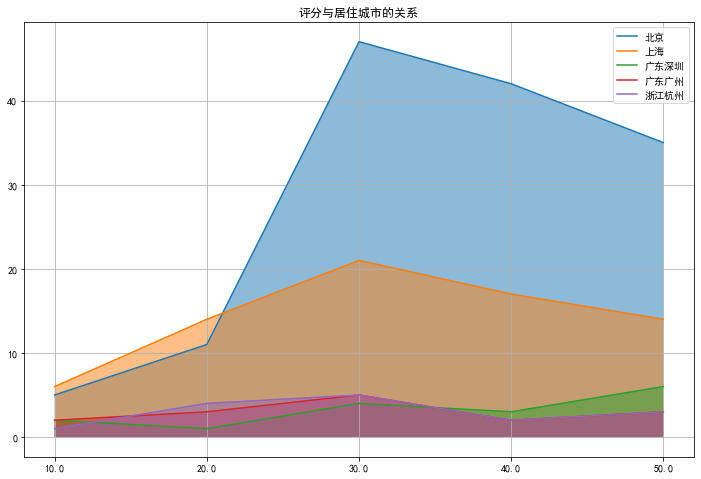

In [100]:
n, m = city_5_score.shape # 形状,n行，m列
plt.figure(figsize=(12,8))
for i in range(m):
    plt.plot(range(n), city_5_score.iloc[:, i]) # 好评放上面，差评放下面
    plt.fill_between(range(n), city_5_score.iloc[:, i], alpha=0.5) # 填充
plt.grid()
plt.title("评分与居住城市的关系")
plt.legend(city_5_score.columns) # 图例
plt.xticks(range(n), city_5_score.index)
plt.show()